In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [3]:
df = pd.read_csv("amazon.csv")

In [4]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [6]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [7]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [8]:
df_cleaned = df.dropna()

In [9]:
# What is the average rating for each product category
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
avg_rating = df.groupby('category')['rating'].mean()
print(avg_rating)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

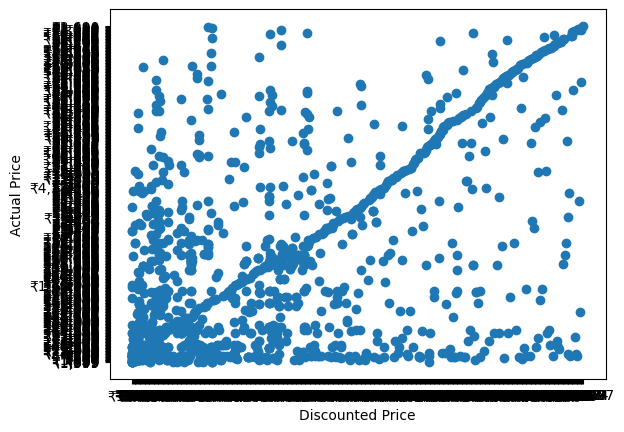

In [11]:
# ' What is the distribution of discounted prices vs. actual prices
plt.scatter(df['discounted_price'], df['actual_price'])
plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')
plt.show()

In [13]:
# How does the average discount percentage vary across categories
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
avg_discount = df.groupby('category')['discount_percentage'].mean()
print(avg_discount)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPen

In [15]:
# What are the most popular product names.
top_products = df["product_name"].value_counts().head(10)
top_products_df = top_products.reset_index()
top_products_df.columns = ["Product Name", "Count"]
print(top_products_df)

                                        Product Name  Count
0  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...      5
1  Fire-Boltt Phoenix Smart Watch with Bluetooth ...      4
2  Wayona Nylon Braided USB to Lightning Fast Cha...      3
3  MI Braided USB Type-C Cable for Charging Adapt...      3
4  Amazonbasics Nylon Braided Usb-C To Lightning ...      3
5  Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB ...      3
6  Amazon Basics USB Type-C to USB-A 2.0 Male Fas...      3
7  boAt A400 USB Type-C to USB-A 2.0 Male Data Ca...      3
8  Duracell USB C To Lightning Apple Certified (M...      3
9  AmazonBasics New Release Nylon USB-A to Lightn...      3


In [20]:
# What are the most popular product keywords
product_text = " ".join(df["product_name"])
words = re.findall(r"\b[a-zA-Z0-9']+\b", product_text.lower())
word_counts = Counter(words)
top_keywords = word_counts.most_common(10)
print("Top 10 Products:")
print(top_products_df)
print("\nTop 10 Keywords:")
print(top_keywords)

Top 10 Products:
                                        Product Name  Count
0  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...      5
1  Fire-Boltt Phoenix Smart Watch with Bluetooth ...      4
2  Wayona Nylon Braided USB to Lightning Fast Cha...      3
3  MI Braided USB Type-C Cable for Charging Adapt...      3
4  Amazonbasics Nylon Braided Usb-C To Lightning ...      3
5  Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB ...      3
6  Amazon Basics USB Type-C to USB-A 2.0 Male Fas...      3
7  boAt A400 USB Type-C to USB-A 2.0 Male Data Ca...      3
8  Duracell USB C To Lightning Apple Certified (M...      3
9  AmazonBasics New Release Nylon USB-A to Lightn...      3

Top 10 Keywords:
[('with', 752), ('for', 674), ('black', 530), ('usb', 417), ('cable', 414), ('1', 413), ('and', 331), ('c', 289), ('3', 275), ('2', 267)]


In [22]:
# What are the most popular product reviews
top_reviews = df["review_content"].value_counts().head(10)
top_reviews_df = top_reviews.reset_index()
top_reviews_df.columns = ["review_content", "Count"]
print(top_reviews_df)

                                      review_content  Count
0  I am not big on camera usage, personally. I wa...      8
1  Worked on iPhone 7 and didn’t work on iPhone X...      7
2  I ordered this cable to connect my phone to An...      7
3  Good product,long wire,Charges good,Nice,I bou...      7
4  128GB SD Card is showing 134GBDon't buy this p...      6
5  I purchased the 6/128gb variant.To sum  it up ...      6
6  Everything is fine but it is bulky and hard, i...      5
7  Good budget mfi certified lightly cable for th...      5
8  About the TV - Wonderful----------------------...      5
9  [Update: Sept 29] boAt seems to have heard the...      5


In [25]:
# What is the correlation between discounted_price and rating
df["discounted_price"] = df["discounted_price"].replace(r"[^0-9.]", "", regex=True).astype(float)
df["rating"] = pd.to_numeric(df["rating"], errors='coerce')
correlation = df[["discounted_price", "rating"]].corr().iloc[0, 1]
print("\nCorrelation between Discounted Price and Rating:", correlation)


Correlation between Discounted Price and Rating: 0.12033741712288648


In [27]:
# ' What are the Top 5 categories based on the highest ratings
top_categories = df.groupby("category")["rating"].mean().sort_values(ascending=False).head(5)
print(top_categories)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


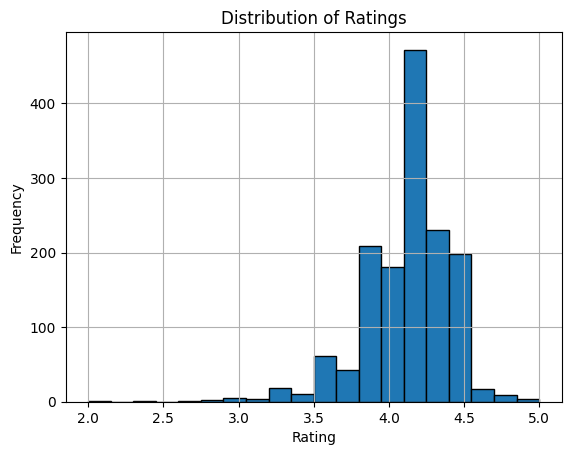

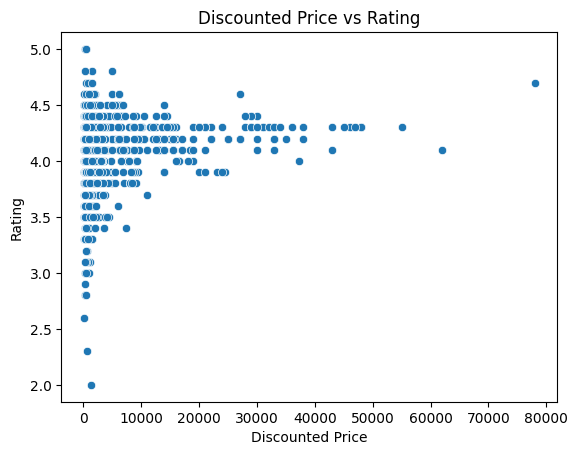

In [28]:
# Identify any potential areas for improvement or optimization based on the data analysis.
# Handle missing values
df.dropna(subset=["discounted_price", "rating"], inplace=True)

# Convert to a DataFrame for better readability
top_products_df = top_products.reset_index()
top_products_df.columns = ["Product Name", "Count"]

# Plot histogram for rating
df["rating"].hist(bins=20, edgecolor='black')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings")
plt.show()

# Plot scatter plot for discounted_price vs rating
sns.scatterplot(x=df["discounted_price"], y=df["rating"])
plt.xlabel("Discounted Price")
plt.ylabel("Rating")
plt.title("Discounted Price vs Rating")
plt.show()